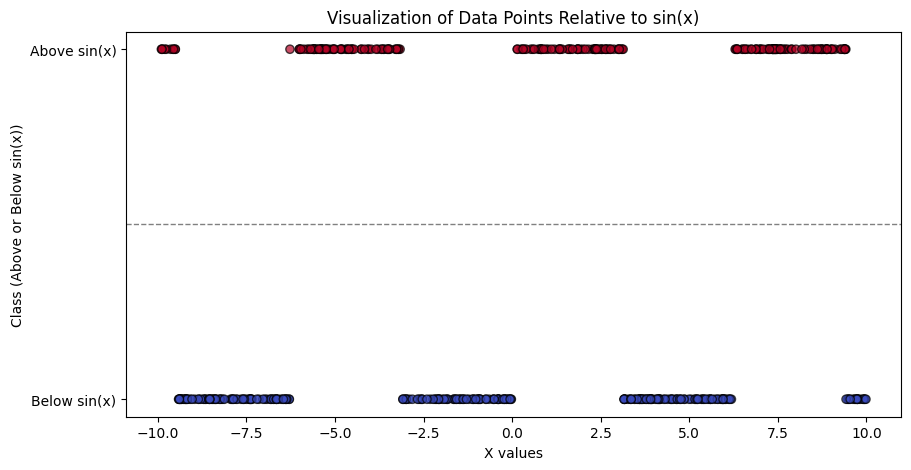

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

X = np.random.uniform(-10, 10, (500, 1))
y = (np.sin(X[:, 0]) > 0).astype(int)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.axhline(0.5, color='gray', linestyle='dashed', linewidth=1)
plt.title("Visualization of Data Points Relative to sin(x)")
plt.xlabel("X values")
plt.ylabel("Class (Above or Below sin(x))")
plt.yticks([0, 1], labels=["Below sin(x)", "Above sin(x)"])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"Dokładność dla drzewa decyzyjnego: {tree_accuracy:.2f}")

Dokładność dla drzewa decyzyjnego: 0.98


In [ ]:
nn_model = Sequential([
    Dense(100, activation='relu', input_shape=(1,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, y_pred_nn)

print(f"Dokładność dla sieci neuronowej: {nn_accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Dokładność dla sieci neuronowej: 0.91


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


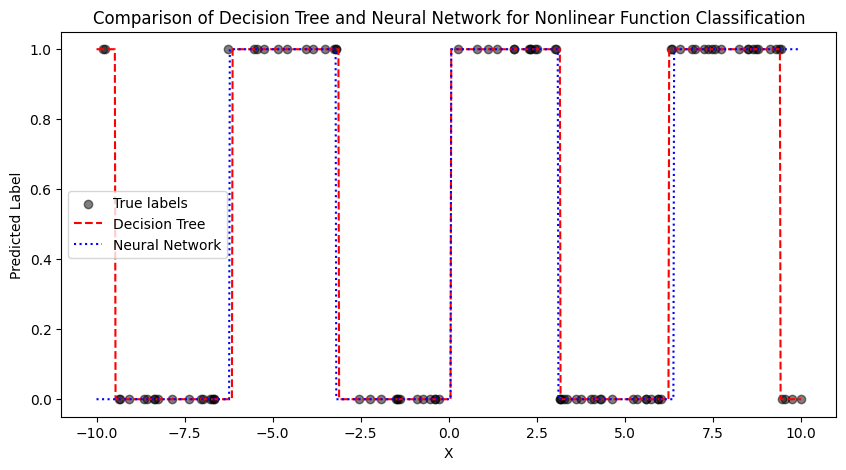

In [ ]:
x_plot = np.linspace(-10, 10, 1000).reshape(-1, 1)
y_tree_plot = tree_clf.predict(x_plot)
y_nn_plot = (nn_model.predict(x_plot) > 0.5).astype(int)

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='black', label="True labels", alpha=0.5)
plt.plot(x_plot, y_tree_plot, label="Decision Tree", linestyle='dashed', color='red')
plt.plot(x_plot, y_nn_plot, label="Neural Network", linestyle='dotted', color='blue')
plt.legend()
plt.title("Comparison of Decision Tree and Neural Network for Nonlinear Function Classification")
plt.xlabel("X")
plt.ylabel("Predicted Label")
plt.show()